# Gerar CSV

- Versão feita em **18 outubro de 2023** para rodar no Colab

**Missão:** Este arquivo tem por objetivo a partir de um conjunto de arquivos JSON, gerar um arquivo CSV.

*Extras* (aproveitamento do êxito): É feita uma breve análise do dataset

# Manipulação de JSON

## Parâmetros

- Aqui estamos setando a variável "pasta" para o nome do diretório onde se encontrará o nosso dataset, após a extração.

In [1]:
pasta = 'dataset'
arquivo = 'dataset.rar'

### Ignorando avisos no Pandas

In [2]:
import warnings
# Ignorar o warning específico
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Importe o arquivo RAR

- A ideia aqui é importarmos a pasta dataset.rar para o colab

- Depois de importar, devemos descompatar, seguindo as células a seguir:

In [3]:
!pip install rarfile

In [4]:
import rarfile
import glob
import os

# Abra o arquivo RAR
rar = rarfile.RarFile(arquivo)

# Extraia todos os arquivos para um diretório específico
rar.extractall('')

# Feche o arquivo RAR
rar.close()

* Só para garantir iremos excluir o arquivo modelo.json, caso exista:

In [5]:
if os.path.exists("dataset/modelo.json"):
    os.remove("dataset/modelo.json")
    print("Arquivo 'modelo.json' excluído com sucesso!")
else:
    print("O arquivo 'modelo.json' não existe na pasta 'dataset'.")

O arquivo 'modelo.json' não existe na pasta 'dataset'.


- Aqui iremos contar a quantidade de arquivos JSON:

In [6]:
arquivos_json = glob.glob(os.path.join(pasta, '*.json'))

quantidade = len(arquivos_json)
print("Quantidade de arquivos JSON na pasta " + pasta + ":    " + str(quantidade))

Quantidade de arquivos JSON na pasta dataset:    168


## Abrindo um conjunto de JSON em uma pasta

- Bibliotecas:

In [7]:
import os
import json
import pandas as pd
import codecs

- Setando a pasta

In [8]:
#Diretório atual
cwd = os. getcwd()
print(cwd)

/content


## Criando o dataframe a partir dos arquivos JSON

In [9]:
df = pd.DataFrame(columns=['id','titulo', 'autor','url', 'tipo_documento',  'rotulo',  'resumo', 'texto'])

In [10]:
df

Empty DataFrame
Columns: [id, titulo, autor, url, tipo_documento, rotulo, resumo, texto]
Index: []

In [11]:
for nome_arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, nome_arquivo)
    print(caminho_arquivo)
    # Verifique se o arquivo é um arquivo JSON
    if nome_arquivo.endswith('.json') and os.path.isfile(caminho_arquivo):
        dados = json.load(codecs.open(caminho_arquivo, 'r', 'utf-8-sig'))
        df_json = pd.DataFrame([dados])
        df = pd.concat([df, df_json], ignore_index=True)
        # O método append deixará de ser usado em breve
        # df = df.append(dados, ignore_index=True)

dataset/110.json
dataset/57.json
dataset/130.json
dataset/140.json
dataset/53.json
dataset/93.json
dataset/101.json
dataset/16.json
dataset/19.json
dataset/161.json
dataset/67.json
dataset/38.json
dataset/115.json
dataset/88.json
dataset/11.json
dataset/24.json
dataset/73.json
dataset/169.json
dataset/86.json
dataset/156.json
dataset/134.json
dataset/29.json
dataset/107.json
dataset/25.json
dataset/152.json
dataset/41.json
dataset/136.json
dataset/55.json
dataset/20.json
dataset/68.json
dataset/184.json
dataset/167.json
dataset/47.json
dataset/176.json
dataset/66.json
dataset/158.json
dataset/36.json
dataset/157.json
dataset/163.json
dataset/180.json
dataset/144.json
dataset/37.json
dataset/186.json
dataset/111.json
dataset/72.json
dataset/78.json
dataset/17.json
dataset/126.json
dataset/164.json
dataset/118.json
dataset/182.json
dataset/98.json
dataset/108.json
dataset/18.json
dataset/49.json
dataset/54.json
dataset/45.json
dataset/99.json
dataset/132.json
dataset/12.json
dataset/58.j

In [12]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

    rotulo                                             resumo  \
0        3  Este trabalho descreve os testes realizados pa...   
1        2  O presente trabalho objetiva a descrever o des...   
2        1  A detecção e a classificação de obstáculos são...   
3        2  A vigilância de áreas restritas e a respectiva...   
4        1  Geração de RF por linhas de transmissão não li...   
..     ...                                                ...   
163      2   Este trabalho apresenta os conceitos e aplica...   
164      3                                                  0   
165      3                                                  0   
166      3                                                  0   
167      1  Este trabalho apresenta um método para síntese...   

                                                 texto  
0     I. INTRODUÇÃO No início da aviação no Brasil,...  
1    I. INTRODUÇÃO Com o avanço da microeletrônica ...  
2    I. INTRODUÇÃO Veículos autônomos terrestres e ...  
3     1. Introdução A vigilância de áreas restritas...  
4    I. INTRODUÇÃO Linhas de transmissão não linear...  
..                                                 ...  
163  I. INTRODUÇÃO A utilização de fios condutores ...  
164  São Paulo (SP) – No período de 24 a 28 de abri...  
165  Campinas (SP) – Um dia histórico para o desenv...  
166  Rio de Janeiro (RJ) – O Centro de Avaliações d...  
167   I. INTRODUÇÃO Sistemas digitais síncronos usa...  

[168 rows x 8 columns]

- Mudando o tipo das colunas **id** e **rotulo** para int

In [13]:
df['id'] = df['id'].astype(int)
df['rotulo'] = df['rotulo'].astype(int)

## Explorando o dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              168 non-null    int64 
 1   titulo          168 non-null    object
 2   autor           168 non-null    object
 3   url             168 non-null    object
 4   tipo_documento  168 non-null    object
 5   rotulo          168 non-null    int64 
 6   resumo          168 non-null    object
 7   texto           168 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.6+ KB


In [15]:
quantidade_por_grupo = df.groupby('rotulo').size()
print(quantidade_por_grupo)

rotulo
1    94
2    41
3    33
dtype: int64


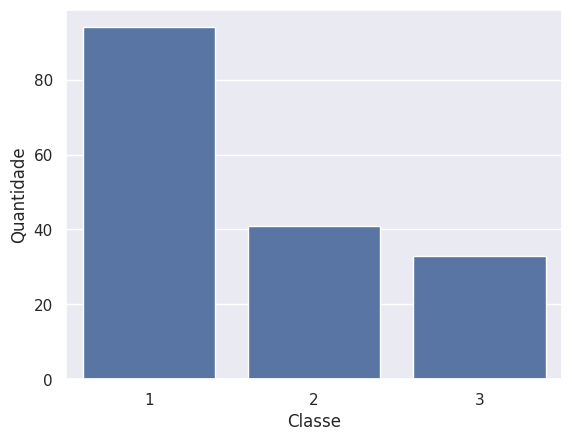

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='rotulo')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Classe")

plt.show()

- Gerando um gráfico de *Pizza*

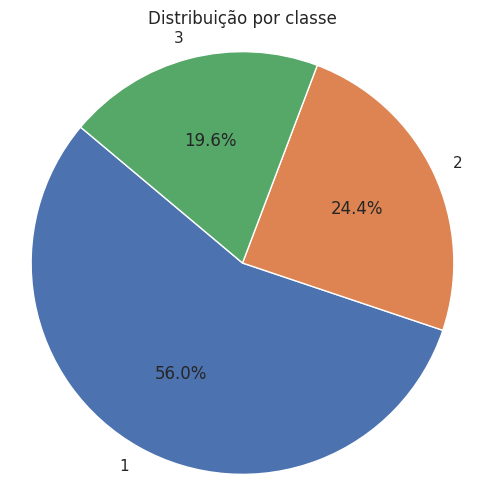

In [17]:
# Calcular a contagem de cada tipo
contagem_tipos = df['rotulo'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por classe')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

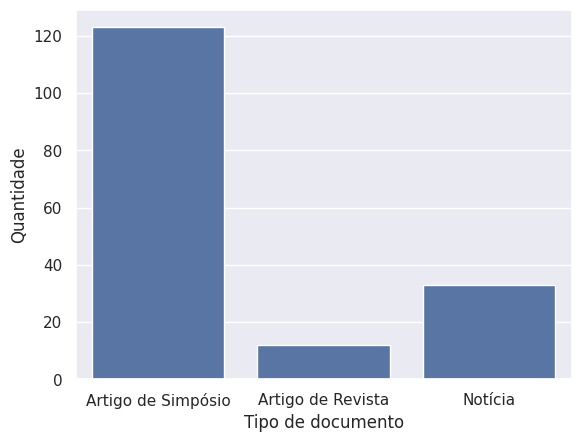

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='tipo_documento')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Tipo de documento")

plt.show()

- Gerando um gráfico de *Pizza*

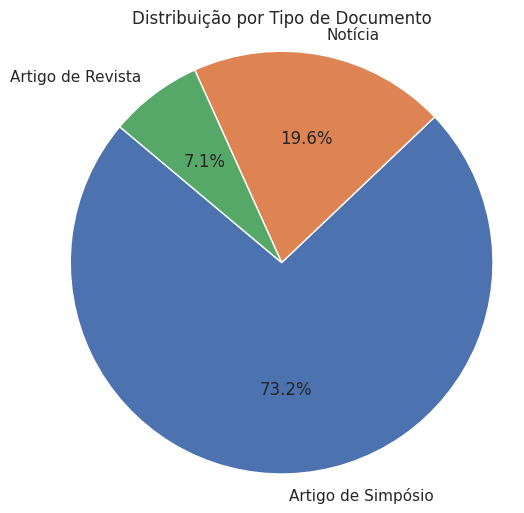

In [19]:
# Calcular a contagem de cada tipo
contagem_tipos = df['tipo_documento'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Tipo de Documento')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

## Alterando resumo

In [20]:
df.head(2)

id                                             titulo  \
0  110   caracterização do óculos de visão noturna em ...   
1   57  pesquisa de nêutrons térmicos em aeronaves atr...   

                                               autor  \
0  cristiano link, ernesto cordeiro marujo e deni...   
1  Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   

                                                 url      tipo_documento  \
0  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1  https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   

   rotulo                                             resumo  \
0       3  Este trabalho descreve os testes realizados pa...   
1       2  O presente trabalho objetiva a descrever o des...   

                                               texto  
0   I. INTRODUÇÃO No início da aviação no Brasil,...  
1  I. INTRODUÇÃO Com o avanço da microeletrônica ...

- Para os documentos sem resumo, iremos assumnir que `resumo = texto`

In [21]:
# Função para contar caracteres e adicionar a nova coluna
def substituir_resumo_por_texto(df):
    for index, row in df.iterrows():
        if row['resumo'] == 0:
            df.at[index, 'resumo'] = row['texto']
    return df

In [22]:
df = substituir_resumo_por_texto(df)

In [23]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

     rotulo                                             resumo  \
0         3  Este trabalho descreve os testes realizados pa...   
1         2  O presente trabalho objetiva a descrever o des...   
2         1  A detecção e a classificação de obstáculos são...   
3         2  A vigilância de áreas restritas e a respectiva...   
4         1  Geração de RF por linhas de transmissão não li...   
..      ...                                                ...   
163       2   Este trabalho apresenta os conceitos e aplica...   
164       3  São Paulo (SP) – No período de 24 a 28 de abri...   
165       3  Campinas (SP) – Um dia histórico para o desenv...   
166       3  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
167       1  Este trabalho apresenta um método para síntese...   

                                                 texto  
0     I. INTRODUÇÃO No início da aviação no Brasil,...  
1    I. INTRODUÇÃO Com o avanço da microeletrônica ...  
2    I. INTRODUÇÃO Veículos autônomos terrestres e ...  
3     1. Introdução A vigilância de áreas restritas...  
4    I. INTRODUÇÃO Linhas de transmissão não linear...  
..                                                 ...  
163  I. INTRODUÇÃO A utilização de fios condutores ...  
164  São Paulo (SP) – No período de 24 a 28 de abri...  
165  Campinas (SP) – Um dia histórico para o desenv...  
166  Rio de Janeiro (RJ) – O Centro de Avaliações d...  
167   I. INTRODUÇÃO Sistemas digitais síncronos usa...  

[168 rows x 8 columns]

# Contando palavras

### Quantidade de caracteres

In [24]:
# Função para contar caracteres e adicionar a nova coluna
def contar_caracteres(texto):
    return len(texto)

In [25]:
df['caracteres'] = df['texto'].apply(contar_caracteres)

### Quantidade de palavras

In [26]:
# Função para contar palavras e adicionar a nova coluna
def contar_palavras(texto):
    palavras = texto.split()  # Divide o texto em palavras usando o carcter espaço
    return len(palavras)

In [27]:
df['palavras'] = df['texto'].apply(contar_palavras)

In [28]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

     rotulo                                             resumo  \
0         3  Este trabalho descreve os testes realizados pa...   
1         2  O presente trabalho objetiva a descrever o des...   
2         1  A detecção e a classificação de obstáculos são...   
3         2  A vigilância de áreas restritas e a respectiva...   
4         1  Geração de RF por linhas de transmissão não li...   
..      ...                                                ...   
163       2   Este trabalho apresenta os conceitos e aplica...   
164       3  São Paulo (SP) – No período de 24 a 28 de abri...   
165       3  Campinas (SP) – Um dia histórico para o desenv...   
166       3  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
167       1  Este trabalho apresenta um método para síntese...   

                                                 texto  caracteres  palavras  
0     I. INTRODUÇÃO No início da aviação no Brasil,...       13419      2068  
1    I. INTRODUÇÃO Com o avanço da microeletrônica ...       24490      3664  
2    I. INTRODUÇÃO Veículos autônomos terrestres e ...       17894      2858  
3     1. Introdução A vigilância de áreas restritas...       42606      6778  
4    I. INTRODUÇÃO Linhas de transmissão não linear...       11401      1775  
..                                                 ...         ...       ...  
163  I. INTRODUÇÃO A utilização de fios condutores ...        9896      1524  
164  São Paulo (SP) – No período de 24 a 28 de abri...        1472       231  
165  Campinas (SP) – Um dia histórico para o desenv...        2869       454  
166  Rio de Janeiro (RJ) – O Cen

### Métricas do Texto

- Caracteres:

In [29]:
media = df['caracteres'].mean()
mediana = df['caracteres'].median()
quartis = df['caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['caracteres'].min()
maximo = df['caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 13798.815476190477
Mediana: 14641.0
Quartil 25%: 9681.0
Quartil 50% (Mediana): 14641.0
Quartil 75%: 18077.25
Mínimo: 1055
Máximo: 42606


- Palavras

In [30]:
media = df['palavras'].mean()
mediana = df['palavras'].median()
quartis = df['palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['palavras'].min()
maximo = df['palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 2214.0773809523807
Mediana: 2399.0
Quartil 25%: 1537.5
Quartil 50% (Mediana): 2399.0
Quartil 75%: 2970.25
Mínimo: 171
Máximo: 6778


#### Métricas por tipo

In [31]:
estatisticas_por_tipop = df.groupby('tipo_documento')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipop.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por tipo ------")
print(estatisticas_por_tipop)

------ Métricas palavras por tipo ------
                          media  mediana  minimo  maximo
tipo_documento                                          
Artigo de Revista   3938.000000   3976.0    1281    6778
Artigo de Simpósio  2559.951220   2504.0     826    4946
Notícia              298.030303    252.0     171     723


In [32]:
estatisticas_por_tipoc = df.groupby('tipo_documento')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_tipoc.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por tipo ------")
print(estatisticas_por_tipoc)

------ Métricas caracteres por tipo ------
                           media  mediana  minimo  maximo
tipo_documento                                           
Artigo de Revista   24881.333333  25359.0    7692   42606
Artigo de Simpósio  15916.227642  15788.0    5386   31676
Notícia              1876.636364   1632.0    1055    4357


#### Métricas por rotulo

In [33]:
estatisticas_por_rotulo = df.groupby('rotulo')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas palavras por rótulo ------
              media  mediana  minimo  maximo
rotulo                                      
1       2538.074468   2528.0     826    4946
2       2658.365854   2463.0     183    6778
3        739.181818    268.0     171    4135


In [34]:
estatisticas_por_rotulo = df.groupby('rotulo')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas caracteres por rótulo ------
               media  mediana  minimo  maximo
rotulo                                       
1       15796.191489  15835.5    5386   31676
2       16564.317073  15073.0    1115   42606
3        4673.393939   1685.0    1055   26043


## Métricas do resumo

In [35]:
df['r_caracteres'] = df['resumo'].apply(contar_caracteres)

In [36]:
df['r_palavras'] = df['resumo'].apply(contar_palavras)

In [37]:
media = df['r_caracteres'].mean()
mediana = df['r_caracteres'].median()
quartis = df['r_caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['r_caracteres'].min()
maximo = df['r_caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 1043.2380952380952
Mediana: 911.0
Quartil 25%: 733.75
Quartil 50% (Mediana): 911.0
Quartil 75%: 1131.5
Mínimo: 261
Máximo: 4357


In [38]:
media = df['r_palavras'].mean()
mediana = df['r_palavras'].median()
quartis = df['r_palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['r_palavras'].min()
maximo = df['r_palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 160.48214285714286
Mediana: 139.0
Quartil 25%: 111.0
Quartil 50% (Mediana): 139.0
Quartil 75%: 173.0
Mínimo: 40
Máximo: 723


In [39]:
estatisticas_por_tipo2 = df.groupby('tipo_documento')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas palavras por tipo ------")
print(estatisticas_por_tipo2)

------ Resumo - Métricas palavras por tipo ------
                         media  mediana  minimo  maximo
tipo_documento                                         
Artigo de Revista   138.083333    137.0      62     197
Artigo de Simpósio  125.764228    130.0      40     202
Notícia             298.030303    252.0     171     723


In [40]:
estatisticas_por_rotulo2 = df.groupby('rotulo')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo2)

------ Resumo - Métricas caracteres por rótulo ------
             media  mediana  minimo  maximo
rotulo                                     
1       125.223404    128.5      57     197
2       161.317073    143.0      40     454
3       259.878788    238.0      97     723


## Análise de tokens

In [41]:
!pip install -qq transformers

In [42]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

- BERTIMBAU

In [43]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

In [44]:
token_lens = []
token_lens2 = []

# Texto e resumo
for txt in df.texto:
  tokens = tokenizer.encode(txt, max_length=9000)
  token_lens.append(len(tokens))

for txt in df.resumo:
  tokens2 = tokenizer.encode(txt, max_length=9000)
  token_lens2.append(len(tokens2))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

<ipython-input-46-77a1badfaa6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 1.0, 'Tokens - Texto')

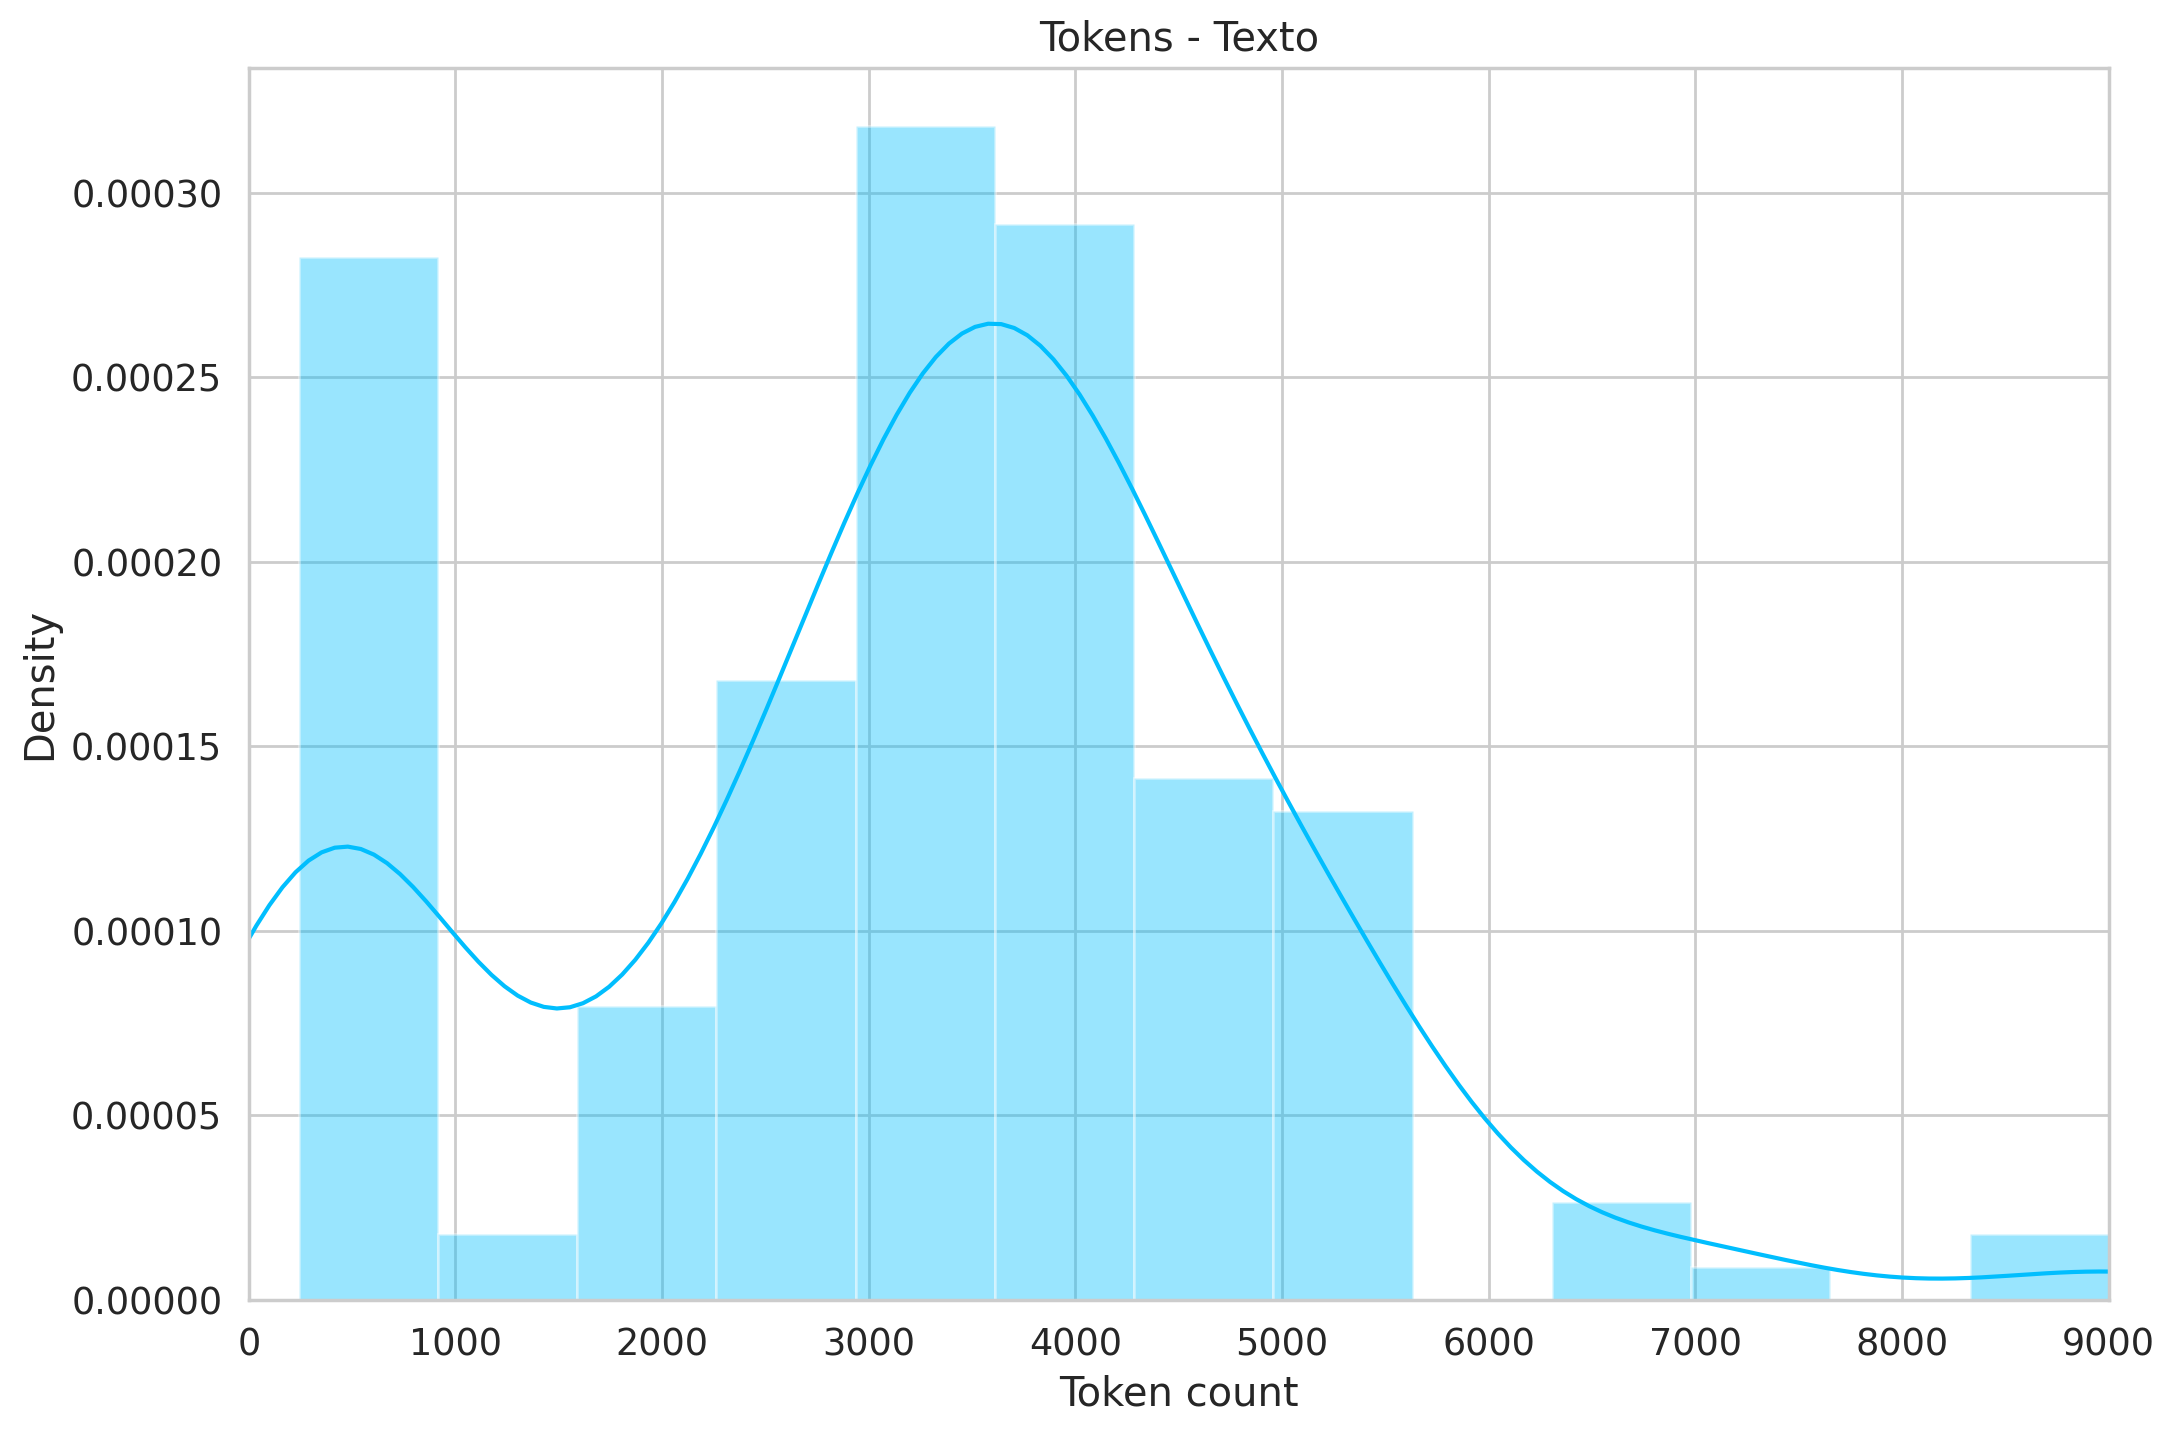

In [46]:
sns.distplot(token_lens)
plt.xlim([0, 9000])
plt.xlabel('Token count')
plt.title("Tokens - Texto")

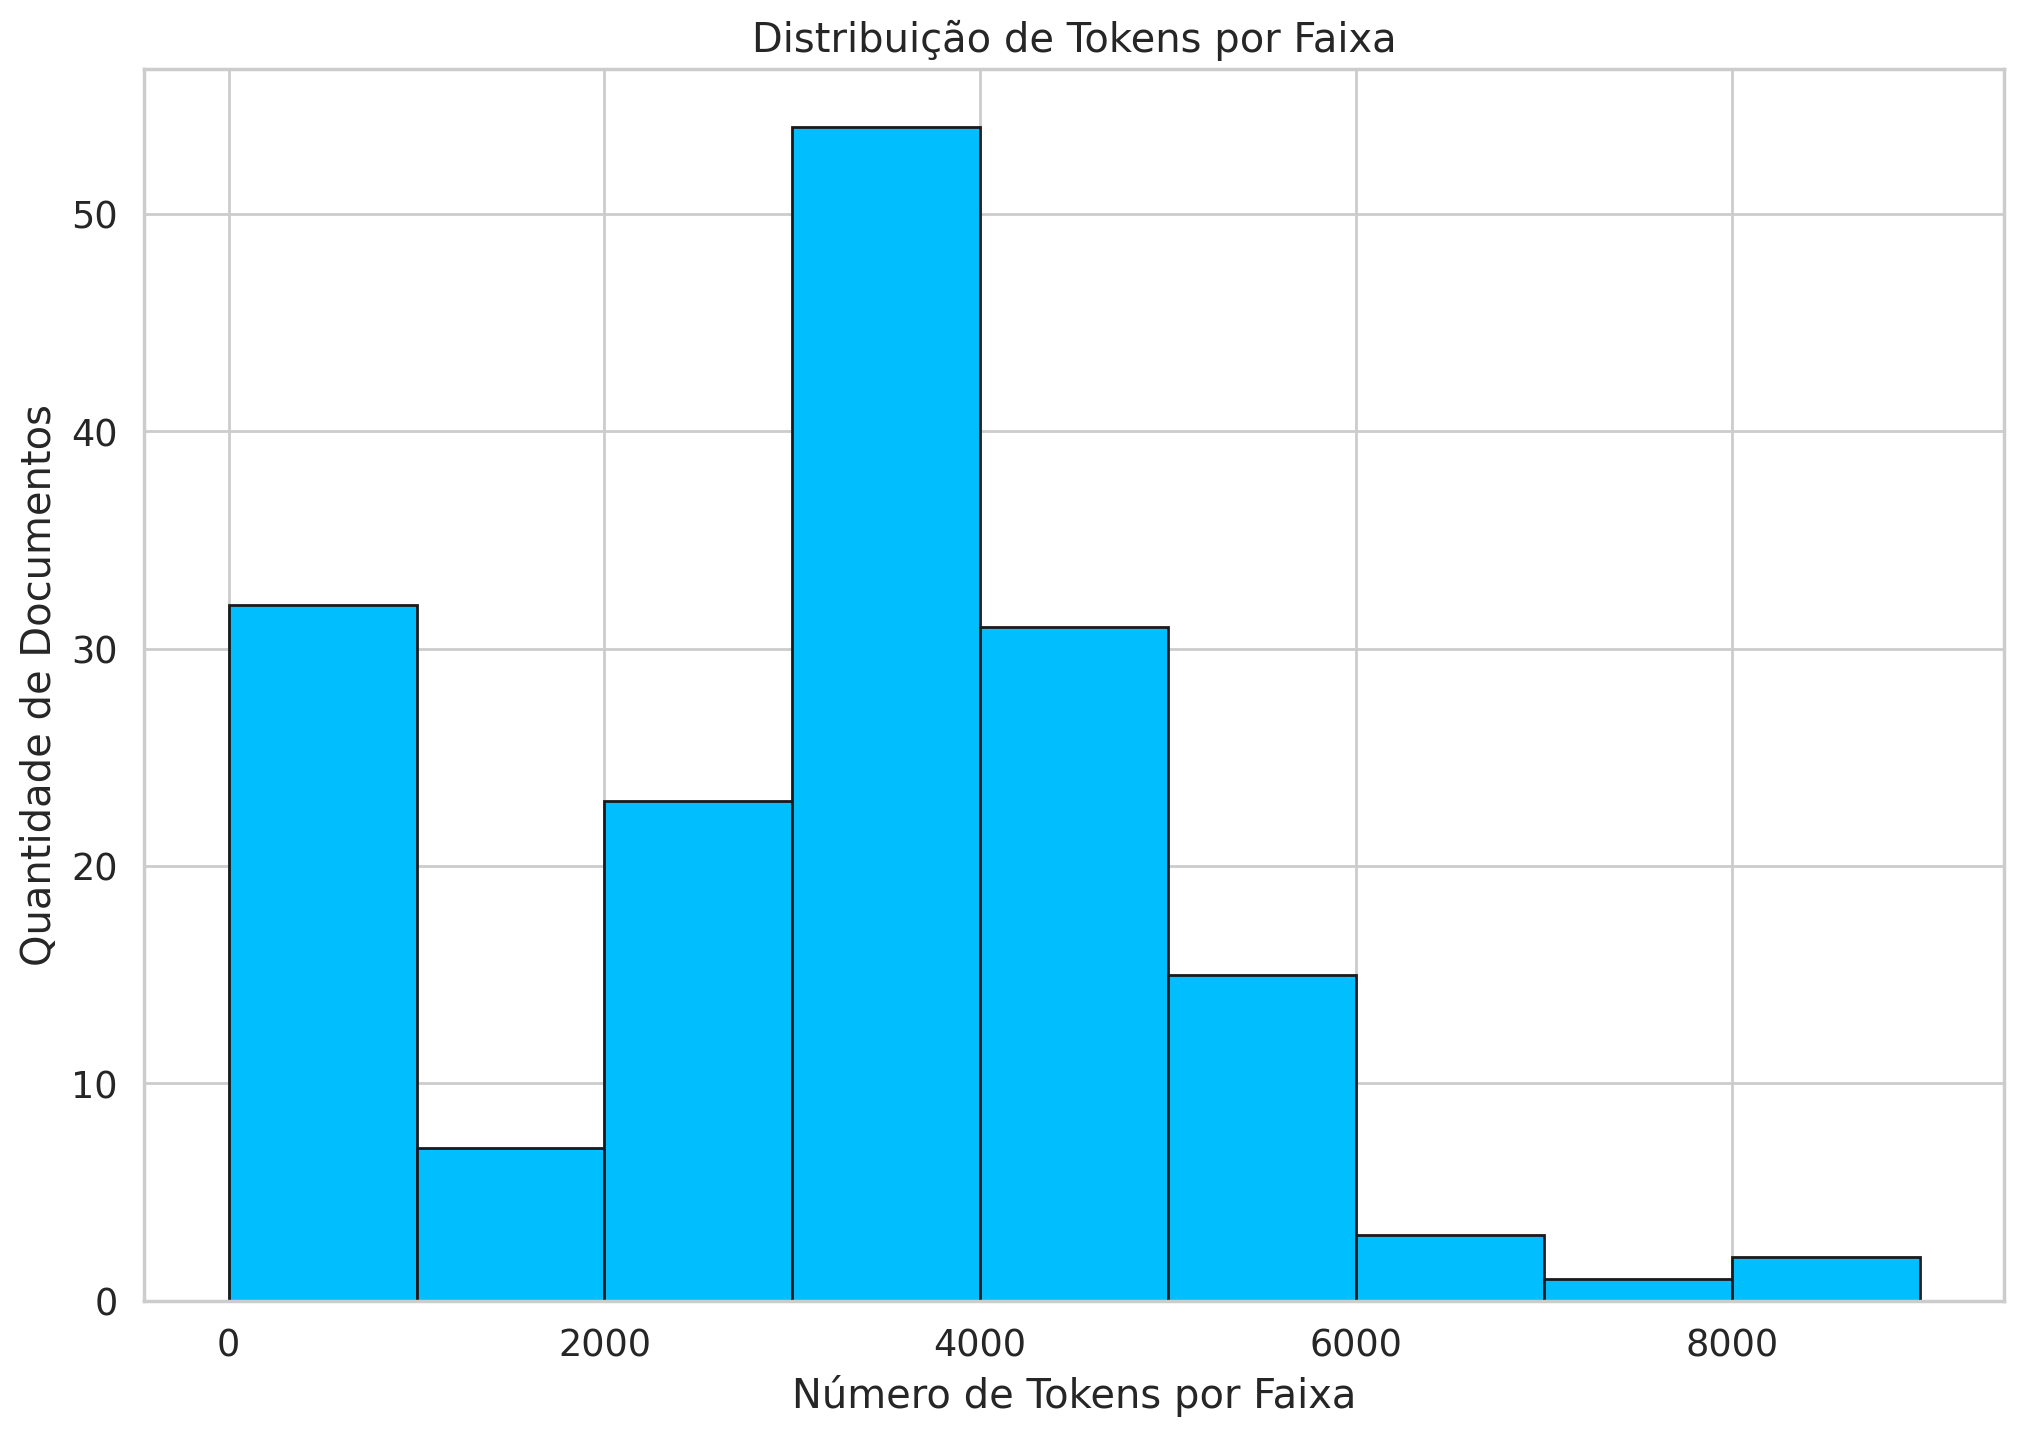

In [47]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000]

# Crie o histograma
plt.hist(token_lens, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

<ipython-input-48-7e271e8096a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens2)


Text(0.5, 1.0, 'Tokens - Resumo')

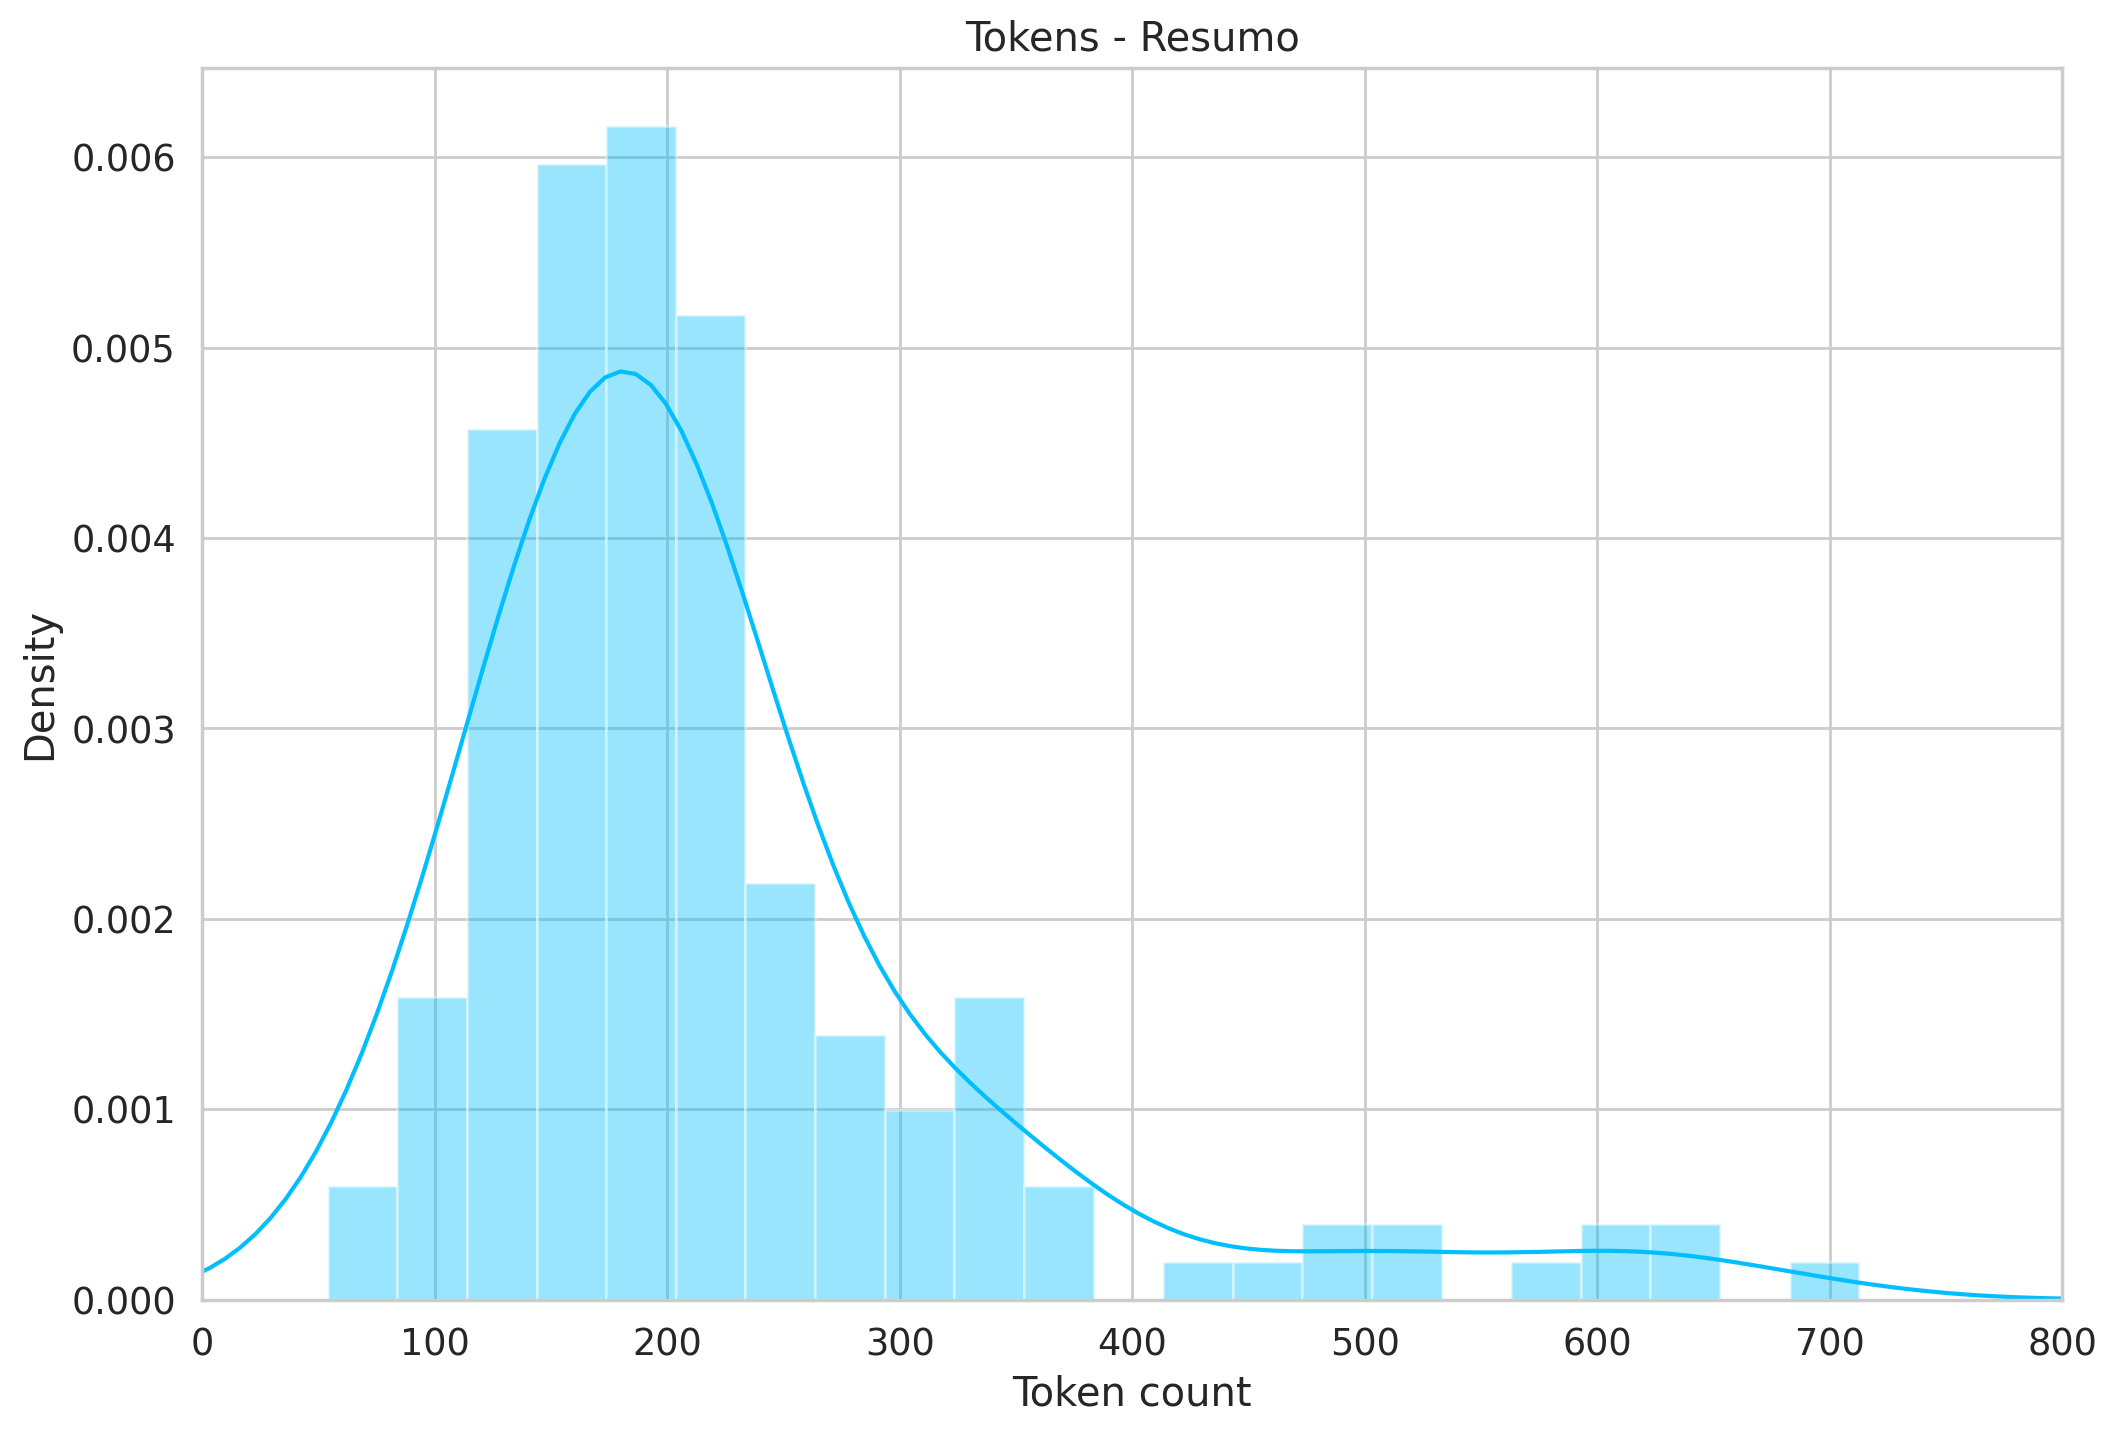

In [48]:
sns.distplot(token_lens2)
plt.xlim([0, 800])
plt.xlabel('Token count')
plt.title("Tokens - Resumo")

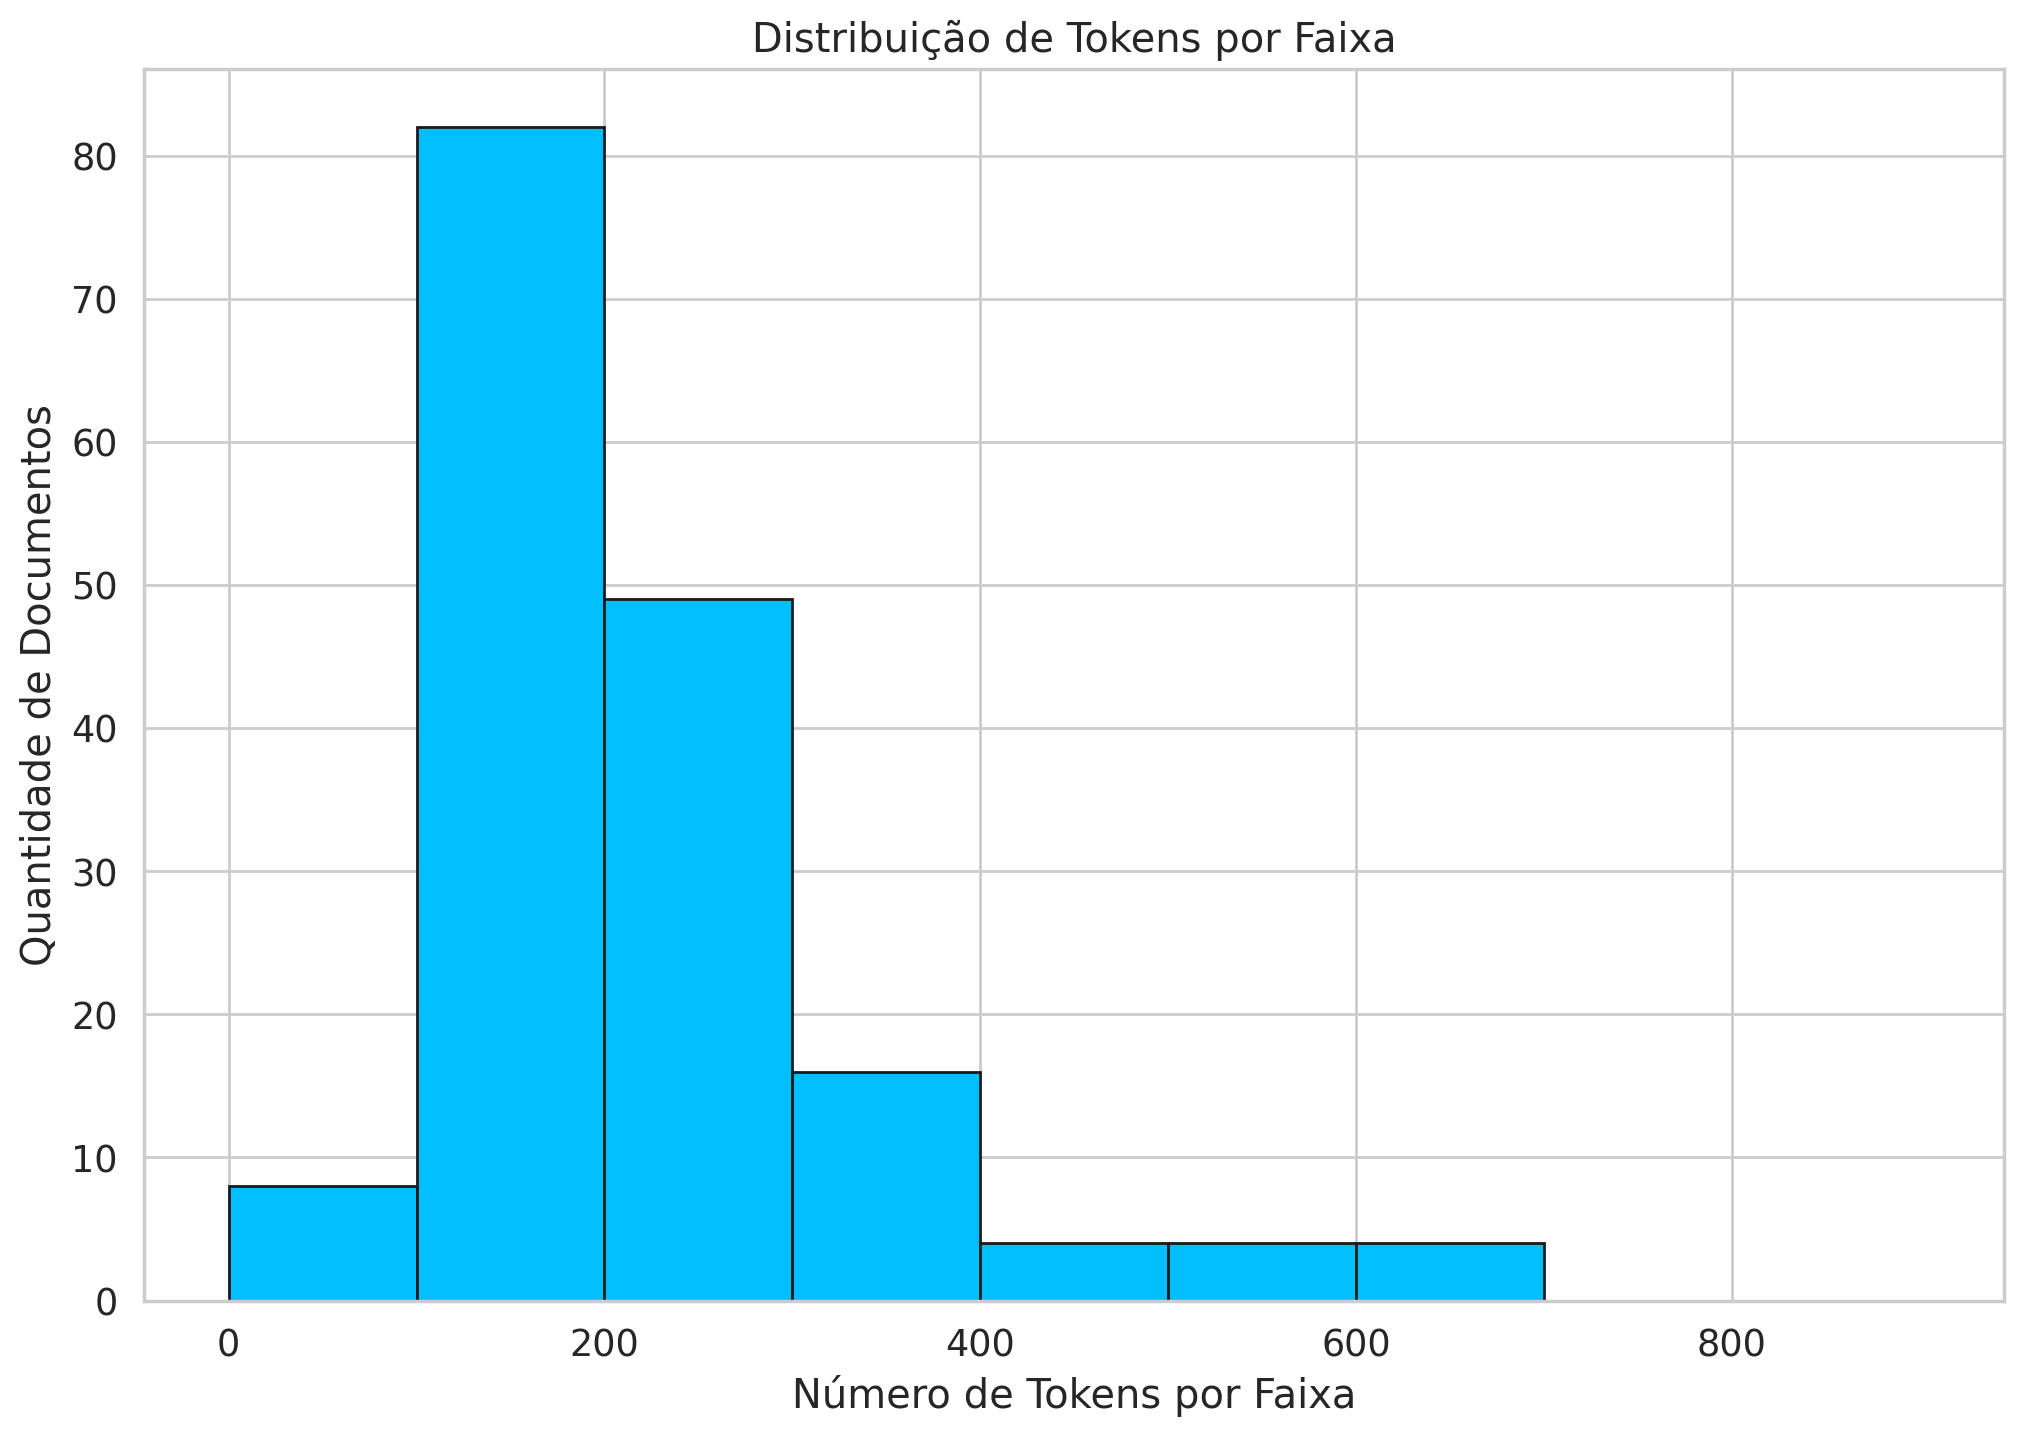

In [49]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,100,200,300,400,500,600,700,800,900]

# Crie o histograma
plt.hist(token_lens2, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

In [50]:
df_token = pd.DataFrame(token_lens, columns=["token texto"])
summary = df_token["token texto"].describe()
summary

count     168.000000
mean     3183.226190
std      1776.591504
min       242.000000
25%      2215.750000
50%      3443.000000
75%      4204.750000
max      9000.000000
Name: token texto, dtype: float64

In [51]:
df_token2 = pd.DataFrame(token_lens2, columns=["token resumo"])
summary = df_token2["token resumo"].describe()
summary

count     168.000000
mean      226.773810
std       132.437702
min        54.000000
25%       157.750000
50%       195.000000
75%       241.250000
max      1072.000000
Name: token resumo, dtype: float64

# Salvando como CSV

In [52]:
colunas_para_remover = ['caracteres', 'palavras', 'r_caracteres', 'r_palavras']
df = df.drop(colunas_para_remover, axis=1)

In [53]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

     rotulo                                             resumo  \
0         3  Este trabalho descreve os testes realizados pa...   
1         2  O presente trabalho objetiva a descrever o des...   
2         1  A detecção e a classificação de obstáculos são...   
3         2  A vigilância de áreas restritas e a respectiva...   
4         1  Geração de RF por linhas de transmissão não li...   
..      ...                                                ...   
163       2   Este trabalho apresenta os conceitos e aplica...   
164       3  São Paulo (SP) – No período de 24 a 28 de abri...   
165       3  Campinas (SP) – Um dia histórico para o desenv...   
166       3  Rio de Janeiro (RJ) – O Centro de Avaliações d...   
167       1  Este trabalho apresenta um método para síntese...   

                                                 texto  
0     I. INTRODUÇÃO No início da aviação no Brasil,...  
1    I. INTRODUÇÃO Com o avanço da microeletrônica ...  
2    I. INTRODUÇÃO Veículos autônomos terrestres e ...  
3     1. Introdução A vigilância de áreas restritas...  
4    I. INTRODUÇÃO Linhas de transmissão não linear...  
..                                                 ...  
163  I. INTRODUÇÃO A utilização de fios condutores ...  
164  São Paulo (SP) – No período de 24 a 28 de abri...  
165  Campinas (SP) – Um dia histórico para o desenv...  
166  Rio de Janeiro (RJ) – O Centro de Avaliações d...  
167   I. INTRODUÇÃO Sistemas digitais síncronos usa...  

[168 rows x 8 columns]

## Dataset sem manipulação

In [54]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset.csv', index=False)

- Importação alternativa:

In [55]:
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import numpy as np
# Pré-processamento
nltk.download('punkt')
nltk.download('rslp')
stemmer = RSLPStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [56]:
df = pd.read_csv("dataset.csv")
df.head(2)

id                                             titulo  \
0  110   caracterização do óculos de visão noturna em ...   
1   57  pesquisa de nêutrons térmicos em aeronaves atr...   

                                               autor  \
0  cristiano link, ernesto cordeiro marujo e deni...   
1  Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   

                                                 url      tipo_documento  \
0  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1  https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   

   rotulo                                             resumo  \
0       3  Este trabalho descreve os testes realizados pa...   
1       2  O presente trabalho objetiva a descrever o des...   

                                               texto  
0   I. INTRODUÇÃO No início da aviação no Brasil,...  
1  I. INTRODUÇÃO Com o avanço da microeletrônica ...

## Dataset com pré-processamento: *dataset_pre_processado_1.csv*

- Remoção de números, minúscula, remoção de acentuação, remoção de tudo que não for caracter alfabetico ou "." ou ","...

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import string
# from unidecode import unidecode
import unicodedata

- Minúscula

In [58]:
df['texto'] = df['texto'].str.lower()
df['resumo'] = df['resumo'].str.lower()

- Número

In [59]:
df['texto'] = df['texto'].str.replace(r'\d', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'\d', '', regex=True)

- Acentuação

In [60]:
def remover_acentos(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

In [61]:
teste = "distância"
remover_acentos(teste)

'distancia'

In [62]:
df['texto'] = df['texto'].apply(remover_acentos)

In [63]:
df['resumo'] = df['resumo'].apply(remover_acentos)

- Ficando só com sinais de pontuação (. e ,) e caracteres alfabéticos:

Perceba que algumas operações anteriores, como remoção de números, foram desnecessárias, uma vez que já seriam executadas aqui.

In [64]:
df['texto'] = df['texto'].str.replace(r'[^a-zA-Z., ]', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'[^a-zA-Z., ]', '', regex=True)

In [65]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset_pre_processado_1.csv', index=False)

In [66]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

     rotulo                                             resumo  \
0         3  este trabalho descreve os testes realizados pa...   
1         2  o presente trabalho objetiva a descrever o des...   
2         1  a deteccao e a classificacao de obstaculos sao...   
3         2  a vigilancia de areas restritas e a respectiva...   
4         1  geracao de rf por linhas de transmissao nao li...   
..      ...                                                ...   
163       2   este trabalho apresenta os conceitos e aplica...   
164       3  sao paulo sp  no periodo de  a  de abril, foi ...   
165       3  campinas sp  um dia historico para o desenvolv...   
166       3  rio de janeiro rj  o centro de avaliacoes do e...   
167       1  este trabalho apresenta um metodo para sintese...   

                                                 texto  
0     i. introducao no inicio da aviacao no brasil,...  
1    i. introducao com o avanco da microeletronica ...  
2    i. introducao veiculos autonomos terrestres e ...  
3     . introducao a vigilancia de areas restritas ...  
4    i. introducao linhas de transmissao nao linear...  
..                                                 ...  
163  i. introducao a utilizacao de fios condutores ...  
164  sao paulo sp  no periodo de  a  de abril, foi ...  
165  campinas sp  um dia historico para o desenvolv...  
166  rio de janeiro rj  o centro de avaliacoes do e...  
167   i. introducao sistemas digitais sincronos usa...  

[168 rows x 8 columns]

## Dataset com pré-processamento: *dataset_pre_processado_2.csv*

- Tokenização e remoção de stop words

In [67]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
stop_words_sem_acentos = {remover_acentos(word) for word in stop_words}

In [69]:
stop_words_sem_acentos.add('figura')
stop_words_sem_acentos.add('fig')
stop_words_sem_acentos.add('um')
stop_words_sem_acentos.add('dois')
stop_words_sem_acentos.add('três')
stop_words_sem_acentos.add('i')
stop_words_sem_acentos.add('ii')
stop_words_sem_acentos.add('introducao')
stop_words_sem_acentos.add('conclusao')
stop_words_sem_acentos.add('desenvolvimento')
stop_words_sem_acentos.add('consideracoes')
stop_words_sem_acentos.add('vez')
stop_words_sem_acentos.add('sobre')
stop_words_sem_acentos.add('pode')
stop_words_sem_acentos.add('onde')
stop_words_sem_acentos.add('secao')
stop_words_sem_acentos.add('alem')
stop_words_sem_acentos.add('por')
stop_words_sem_acentos.add('atraves')
stop_words_sem_acentos.add('nesse')
stop_words_sem_acentos.add('neste')
stop_words_sem_acentos.add('naquele')
stop_words_sem_acentos.add('esse')
stop_words_sem_acentos.add('este')
stop_words_sem_acentos.add('aquele')
stop_words_sem_acentos.add('essa')
stop_words_sem_acentos.add('esta')
stop_words_sem_acentos.add('aquela')

In [70]:
def preprocess_text(text):
    # Tokenização das palavras
    words = word_tokenize(text, language='portuguese')
    # Remoção das stop words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words_sem_acentos and word.isalpha()]
    return " ".join(filtered_words)

In [71]:
df['texto'] = df['texto'].apply(preprocess_text)
df['resumo'] = df['resumo'].apply(preprocess_text)

In [72]:
df

id                                             titulo  \
0    110   caracterização do óculos de visão noturna em ...   
1     57  pesquisa de nêutrons térmicos em aeronaves atr...   
2    130  detecção e classificação de objetos com uso de...   
3    140  sistema de aeronaves remotamente pilotadas par...   
4     53  formulação numérica unidimensional de linhas d...   
..   ...                                                ...   
163  162  modificação e controle das propriedades de ant...   
164  135  centro tecnológico do exército realiza testes ...   
165   23  exército e embraer apresentam radar desenvolvi...   
166    2  centro de avaliações do exército encerra avali...   
167  120  uma abordagem prática para projeto otimizado d...   

                                                 autor  \
0    cristiano link, ernesto cordeiro marujo e deni...   
1    Evaldo C. F. Pereira, Adriane C. M. Prado1, Cl...   
2    danilo habermann, rodrigo l. bragança silva, d...   
3    ricardo maroquio bernardo, luis claudio batist...   
4    Ana Flávia Guedes Greco, Fernanda Sayuri Yamas...   
..                                                 ...   
163  antônio tomaz de carvalho, joaquim j. barroso,...   
164                             Noticiário do Exército   
165                             Noticiário do Exército   
166                             Noticiário do Exército   
167  kledermon garcia, duarte l. oliveira, roberto ...   

                                                   url      tipo_documento  \
0    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
1    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
2    https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
3    http://www.ebrevistas.eb.mil.br/CT/article/vie...   Artigo de Revista   
4    https://www.sige.ita.br/edicoes-anteriores/202...  Artigo de Simpósio   
..                                                 ...                 ...   
163  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   
164  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
165  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
166  https://www.eb.mil.br/web/noticias/noticiario-...             Notícia   
167  https://www.sige.ita.br/edicoes-anteriores/201...  Artigo de Simpósio   

     rotulo                                             resumo  \
0         3  trabalho descreve testes realizados caracteriz...   
1         2  presente trabalho objetiva descrever dispositi...   
2         1  deteccao classificacao obstaculos fundamentais...   
3         2  vigilancia areas restritas respectiva manutenc...   
4         1  geracao rf linhas transmissao lineares ltnls v...   
..      ...                                                ...   
163       2  trabalho apresenta conceitos aplicacoes teoria...   
164       3  paulo sp periodo abril realizada dependencias ...   
165       3  campinas sp dia historico tecnologias defesa b...   
166       3  rio janeiro rj centro avaliacoes exercito caex...   
167       1  trabalho apresenta metodo sintese otimizada si...   

                                                 texto  
0    inicio aviacao brasil atividades busca salvame...  
1    avanco microeletronica reducao dimensoes footp...  
2    veiculos autonomos terrestres subsistemas pode...  
3    vigilancia areas restritas consiste controlar ...  
4    linhas transmissao lineares ltnls podem discre...  
..                                                 ...  
163  utilizacao fios condutores metalicos sintese d...  
164  paulo sp periodo abril realizada dependencias ...  
165  campinas sp dia historico tecnologias defesa b...  
166  rio janeiro rj centro avaliacoes exercito caex...  
167  sistemas digitais sincronos usam sinal relogio...  

[168 rows x 8 columns]

In [73]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset_pre_processado_2.csv', index=False)

# Outras análises do *corpus*

## Nuvem de palavras por faixa TRL

In [74]:
!pip install wordcloud

- Informações sobre a biblioteca WordCloud

cff-version: 1.2.0

authors:

- family-names: "Mueller"

  given-names: "Andreas C"

  orcid: "https://orcid.org/0000-0002-2349-9428"



title: "Wordcloud"

version: 1.9.1

date-released: 2023-4-27

url: "https://github.com/amueller/wordcloud"

### Nuvem para o texto

In [75]:
# Concatene todos os textos processados em um único texto
all_text = " ".join(df['texto'])
t_all_text = nltk.word_tokenize(all_text)
freq_all = FreqDist(t_all_text)
freq_all = freq_all.most_common(100)

In [76]:
primeiros_10_valores = freq_all[:10]
print(primeiros_10_valores)

[('sinal', 1059), ('sistema', 972), ('dados', 946), ('frequencia', 849), ('cada', 705), ('forma', 689), ('radar', 665), ('tempo', 657), ('sinais', 624), ('resultados', 606)]


In [77]:
dicionario_all = dict(freq_all)

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

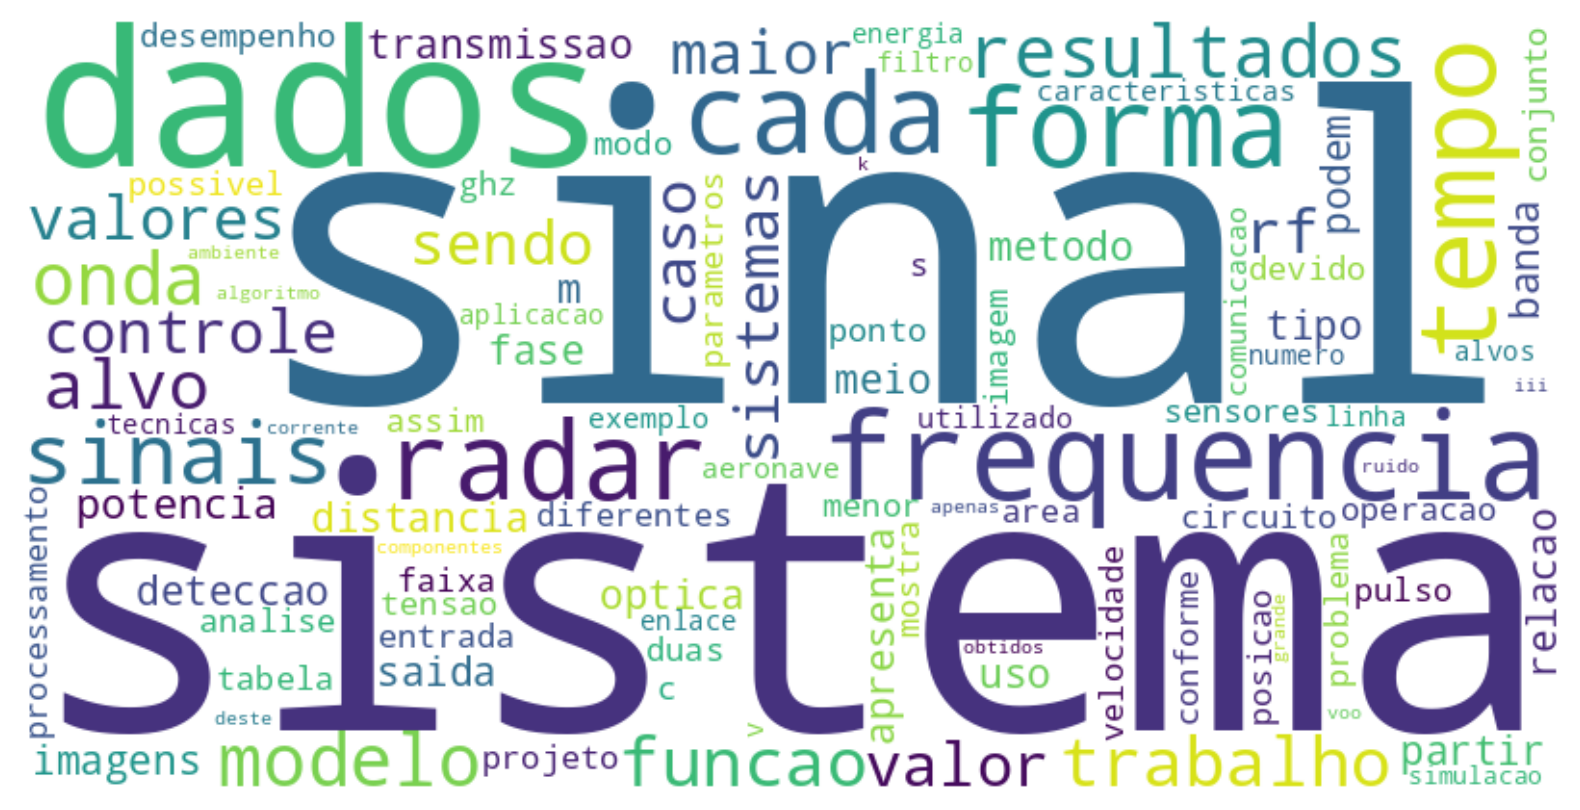

In [79]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100)
wordcloud.generate_from_frequencies(dicionario_all)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexto.png')

### Nuvem para o resumo

In [80]:
# Concatene todos os textos processados em um único texto
all_resumo = " ".join(df['resumo'])
t_all_resumo = nltk.word_tokenize(all_resumo)
freq_resumo = FreqDist(t_all_resumo)
freq_resumo = freq_resumo.most_common(100)

In [81]:
primeiros_10_valores = freq_resumo[:10]
print(primeiros_10_valores)

[('sistema', 149), ('exercito', 122), ('sistemas', 82), ('radar', 82), ('trabalho', 77), ('projeto', 68), ('tecnologia', 60), ('emprego', 57), ('artigo', 57), ('testes', 55)]


In [82]:
dicionario_resumo = dict(freq_resumo)

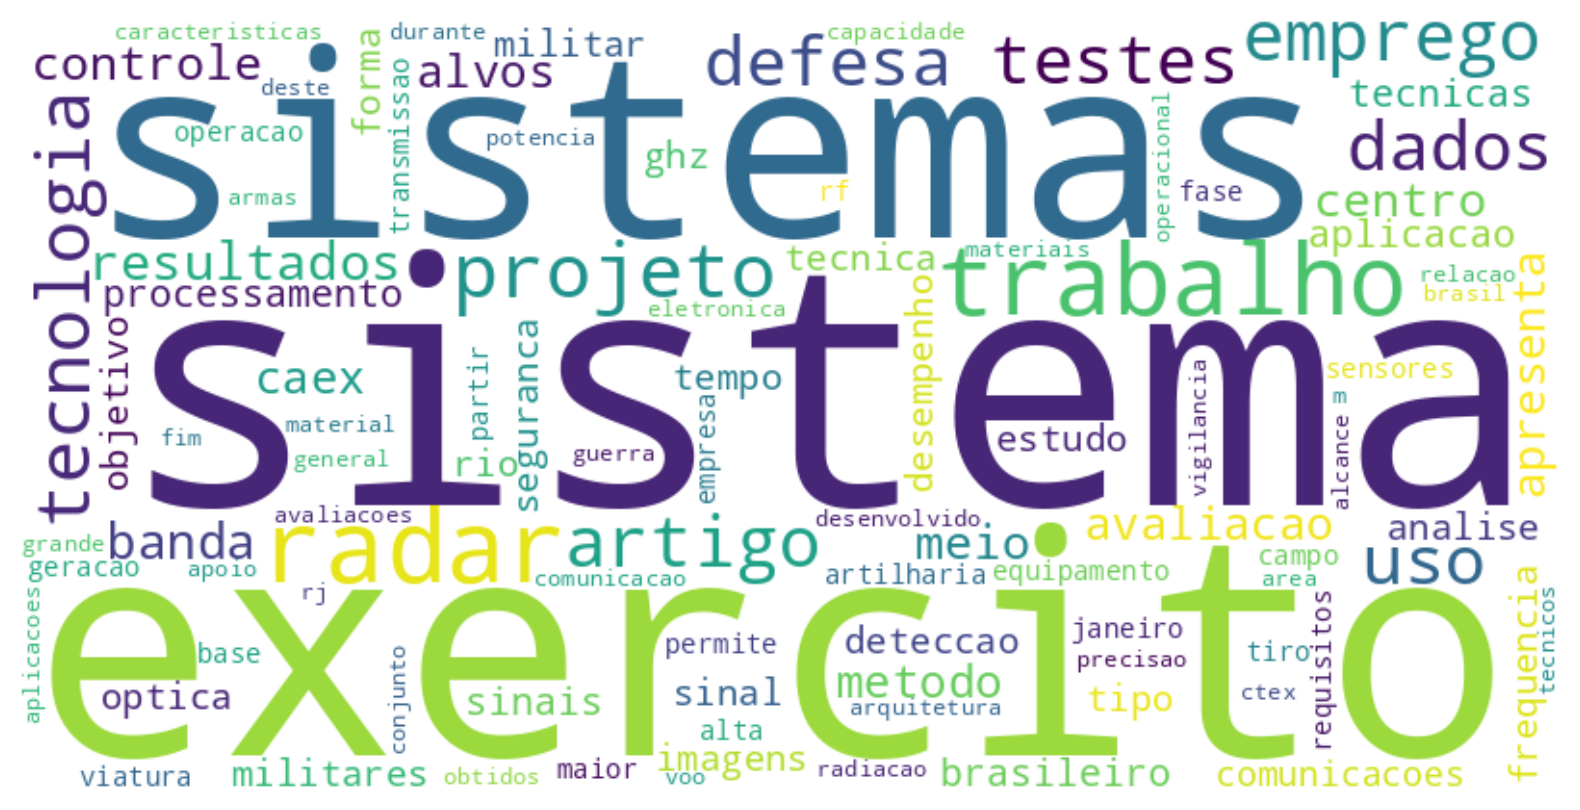

In [83]:
# Crie a nuvem de palavras
wordcloud2 = WordCloud(width=800, height=400, background_color='white')
wordcloud2.generate_from_frequencies(dicionario_resumo)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud2.to_file('nuvemResumo.png')

### Nuvem de palavras por faixa:

In [84]:
linhas_fx_1 = df[df['rotulo'] == 1]
linhas_fx_2 = df[df['rotulo'] == 2]
linhas_fx_3 = df[df['rotulo'] == 3]

In [85]:
# Concatene todos os textos processados em um único texto
all_text_f1 = " ".join(linhas_fx_1['texto'])
all_text_f2 = " ".join(linhas_fx_2['texto'])
all_text_f3 = " ".join(linhas_fx_3['texto'])

In [86]:
t_all_text_1 = nltk.word_tokenize(all_text_f1)
freq_text1 = FreqDist(t_all_text_1)
freq_text1 = freq_text1.most_common(100)
primeiros_10_valores = freq_text1[:10]
print(primeiros_10_valores)
dicionario_text1 = dict(freq_text1)

[('sinal', 728), ('frequencia', 577), ('dados', 542), ('sistema', 540), ('forma', 454), ('radar', 443), ('tempo', 439), ('cada', 437), ('resultados', 430), ('modelo', 425)]


In [87]:
t_all_text_2 = nltk.word_tokenize(all_text_f2)
freq_text2 = FreqDist(t_all_text_2)
freq_text2 = freq_text2.most_common(100)
primeiros_10_valores = freq_text2[:10]
print(primeiros_10_valores)
dicionario_text2 = dict(freq_text2)

[('sinal', 307), ('dados', 291), ('sistema', 283), ('frequencia', 253), ('rf', 238), ('cada', 234), ('sinais', 234), ('forma', 195), ('transmissao', 190), ('tempo', 183)]


In [88]:
t_all_text_3 = nltk.word_tokenize(all_text_f3)
freq_text3 = FreqDist(t_all_text_3)
freq_text3 = freq_text3.most_common(100)
primeiros_10_valores = freq_text3[:10]
print(primeiros_10_valores)
dicionario_text3 = dict(freq_text3)

[('sistema', 149), ('dados', 113), ('exercito', 103), ('controle', 93), ('hf', 79), ('radio', 57), ('testes', 55), ('comunicacoes', 54), ('software', 52), ('defesa', 49)]


In [89]:
all_resumo_f1 = " ".join(linhas_fx_1['resumo'])
all_resumo_f2 = " ".join(linhas_fx_2['resumo'])
all_resumo_f3 = " ".join(linhas_fx_3['resumo'])

In [90]:
t_all_resumo1 = nltk.word_tokenize(all_resumo_f1)
freq_resumo1 = FreqDist(t_all_resumo1)
freq_resumo1 = freq_resumo1.most_common(100)
primeiros_10_valores = freq_resumo1[:10]
print(primeiros_10_valores)
dicionario_resumo1 = dict(freq_resumo1)

[('trabalho', 54), ('sistemas', 48), ('resultados', 37), ('artigo', 37), ('radar', 37), ('metodo', 36), ('banda', 35), ('uso', 29), ('imagens', 28), ('sistema', 27)]


In [91]:
t_all_resumo2 = nltk.word_tokenize(all_resumo_f2)
freq_resumo2 = FreqDist(t_all_resumo2)
freq_resumo2 = freq_resumo2.most_common(100)
primeiros_10_valores = freq_resumo2[:10]
print(primeiros_10_valores)
dicionario_resumo2 = dict(freq_resumo2)

[('sistema', 39), ('exercito', 24), ('radar', 23), ('projeto', 22), ('sinais', 19), ('trabalho', 18), ('sistemas', 18), ('artigo', 17), ('uso', 16), ('emprego', 15)]


In [92]:
t_all_resumo3 = nltk.word_tokenize(all_resumo_f3)
freq_resumo3 = FreqDist(t_all_resumo3)
freq_resumo3 = freq_resumo3.most_common(100)
primeiros_10_valores = freq_resumo3[:10]
print(primeiros_10_valores)
dicionario_resumo3 = dict(freq_resumo3)

[('exercito', 98), ('sistema', 83), ('testes', 40), ('tecnologia', 39), ('centro', 34), ('caex', 34), ('defesa', 32), ('brasileiro', 31), ('artilharia', 29), ('rio', 27)]


#### Nuvens do texto por faixa

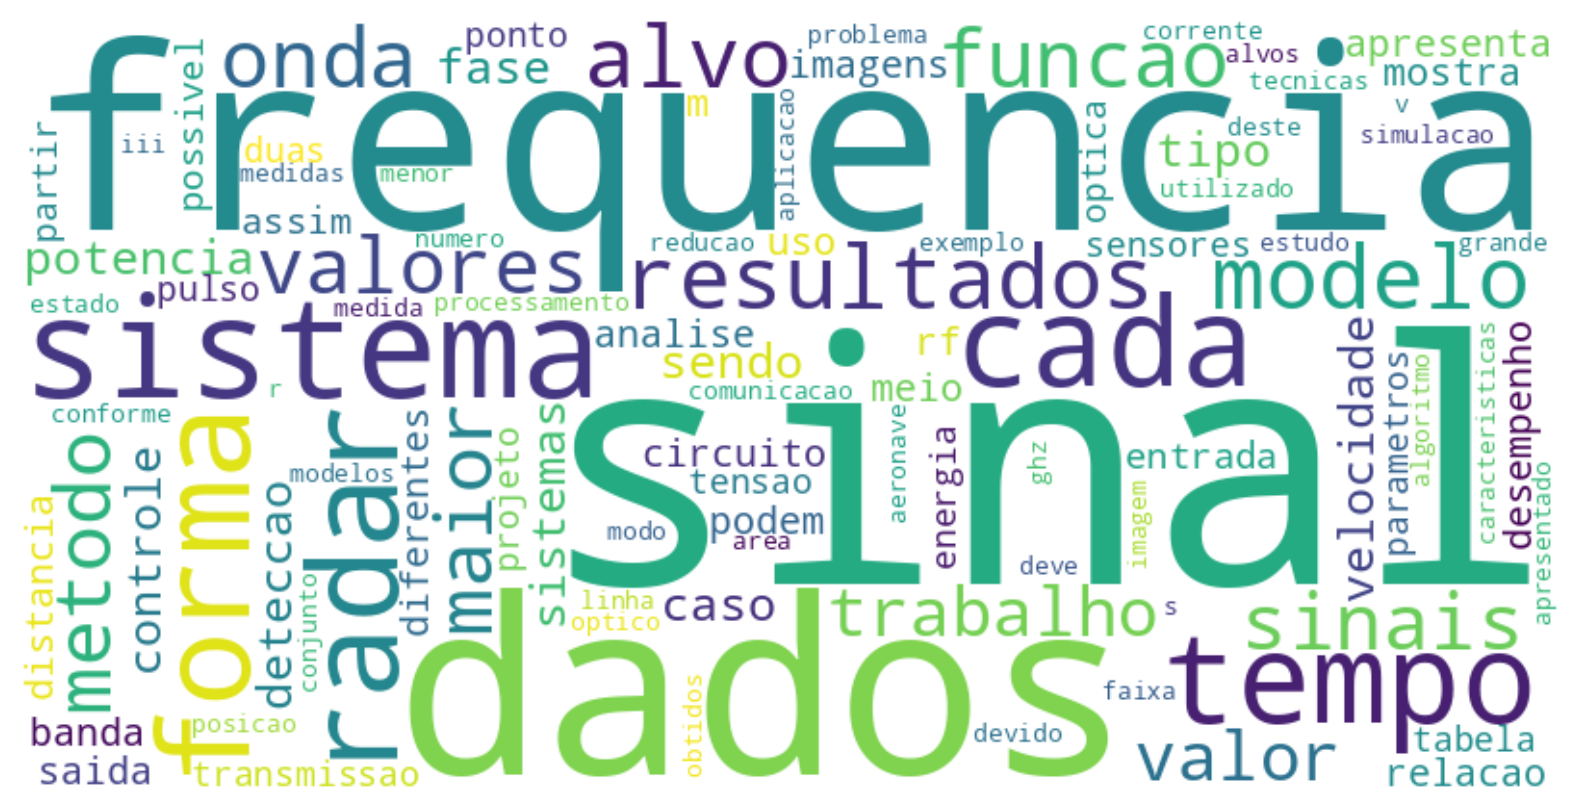

In [93]:
# Crie a nuvem de palavras
wordcloudt1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt1, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt1.to_file('nuvemTexo1.png')

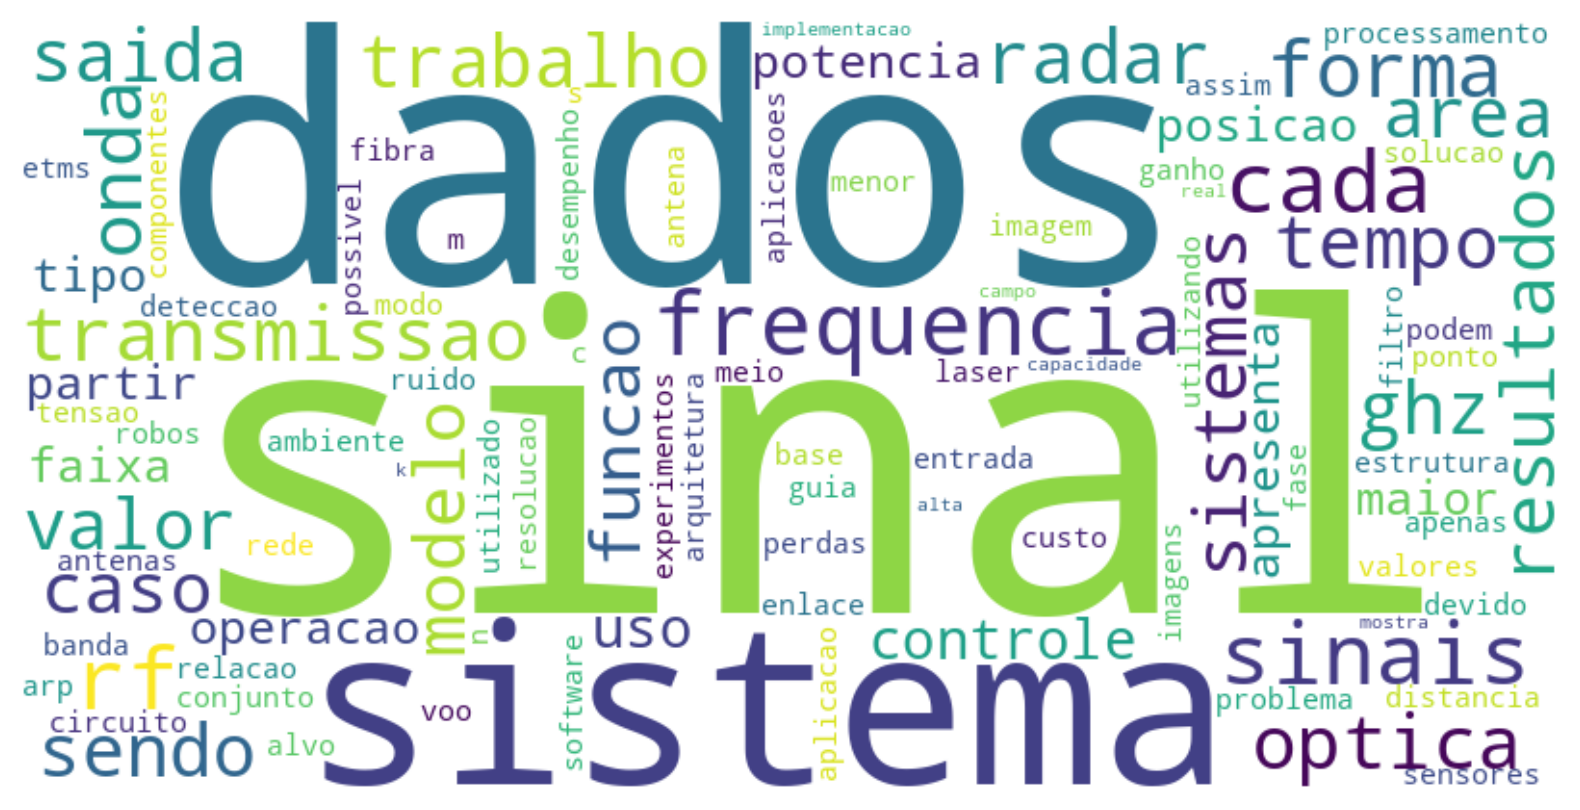

In [94]:
# Crie a nuvem de palavras
wordcloudt2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt2.to_file('nuvemTexo2.png')

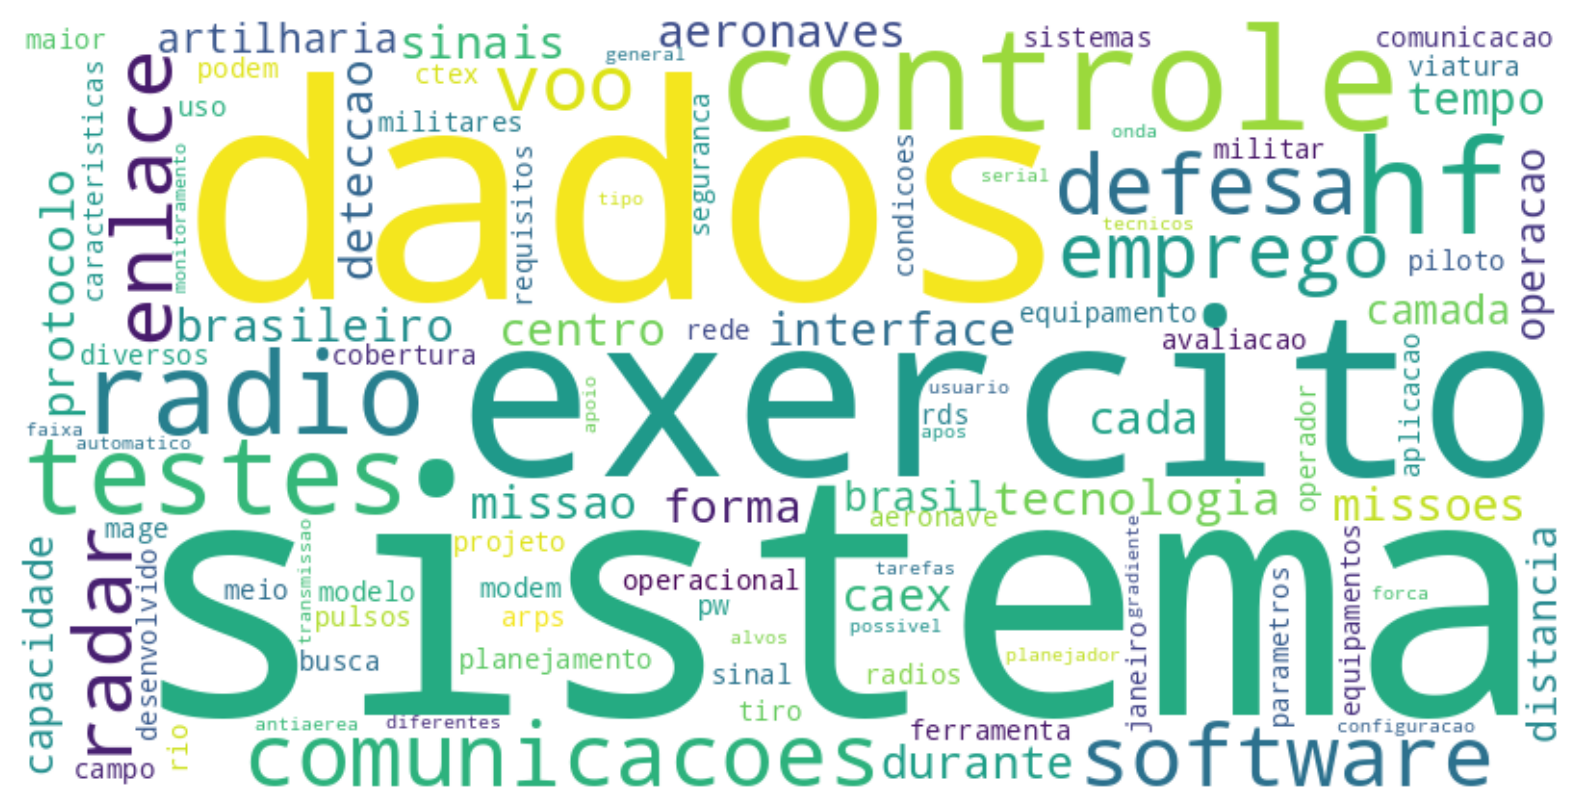

In [95]:
# Crie a nuvem de palavras
wordcloudt3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt3, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt3.to_file('nuvemTexo3.png')

#### Nuvens do resumo por faixa

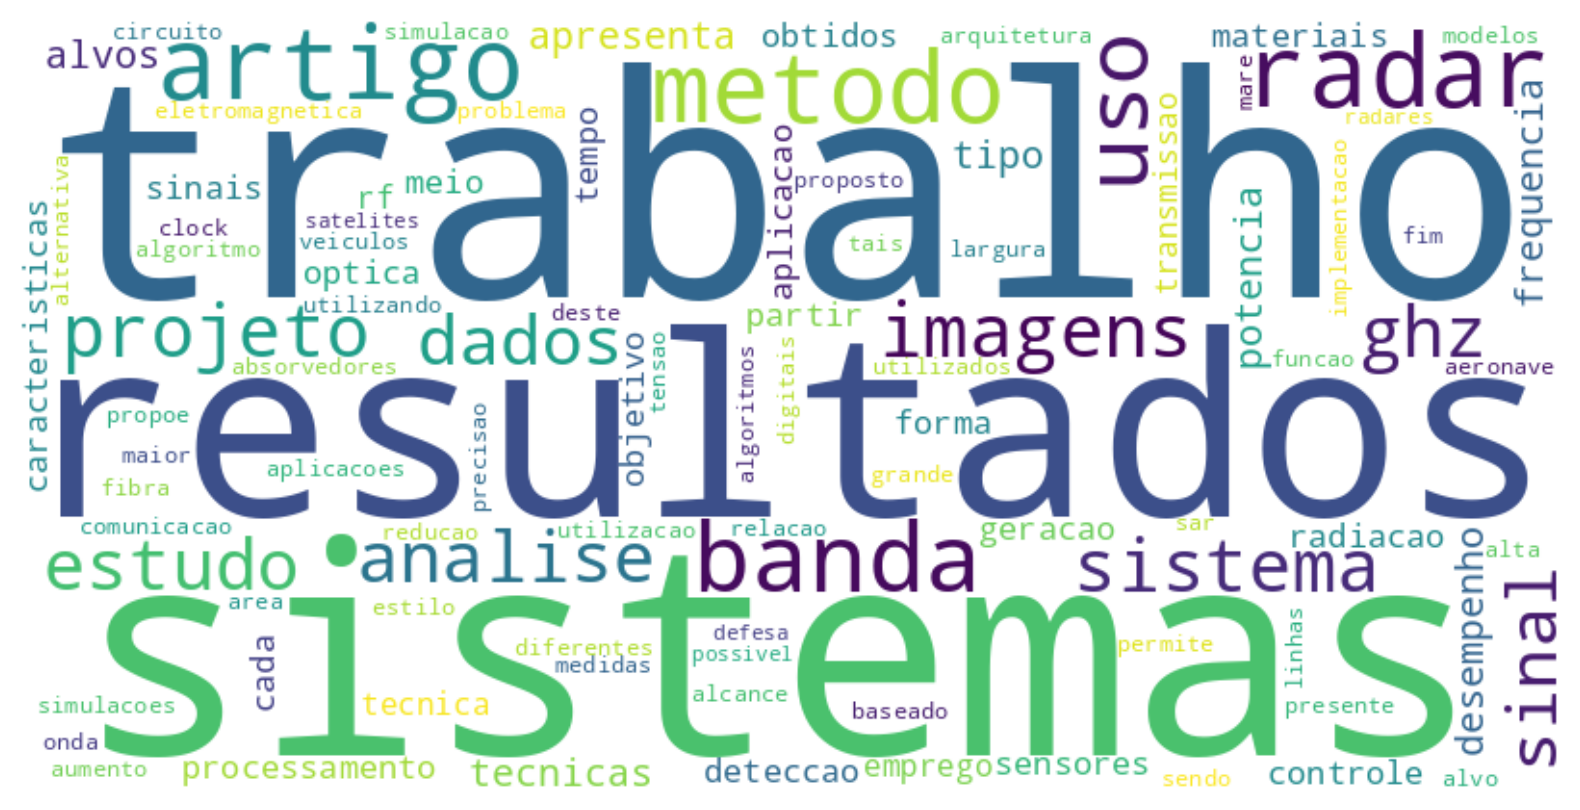

In [96]:
# Crie a nuvem de palavras
wordcloudr1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr1, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr1.to_file('nuvemResumo1.png')

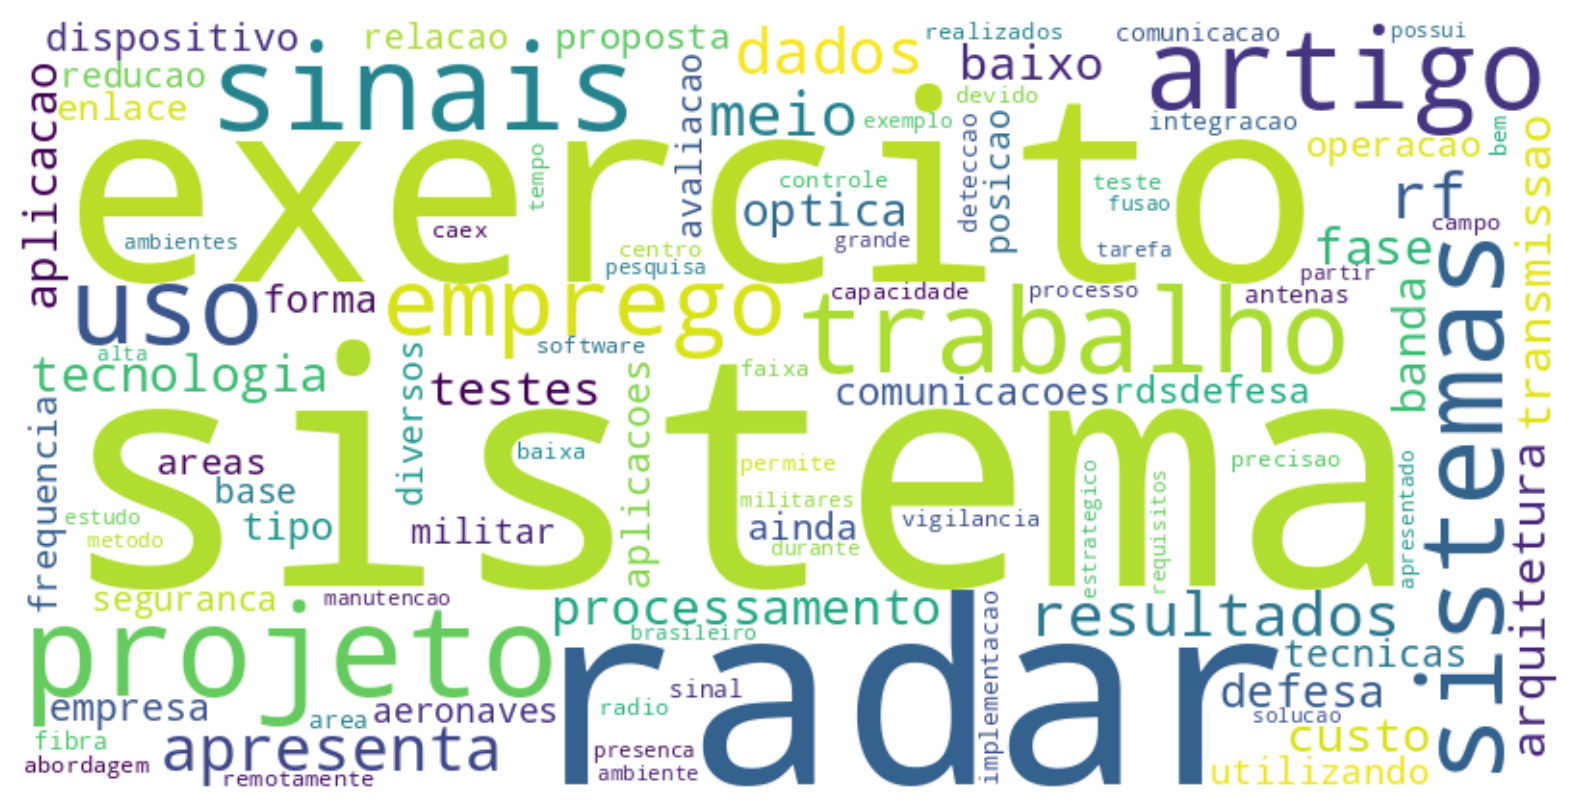

In [97]:
# Crie a nuvem de palavras
wordcloudr2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr2.to_file('nuvemResumo2.png')

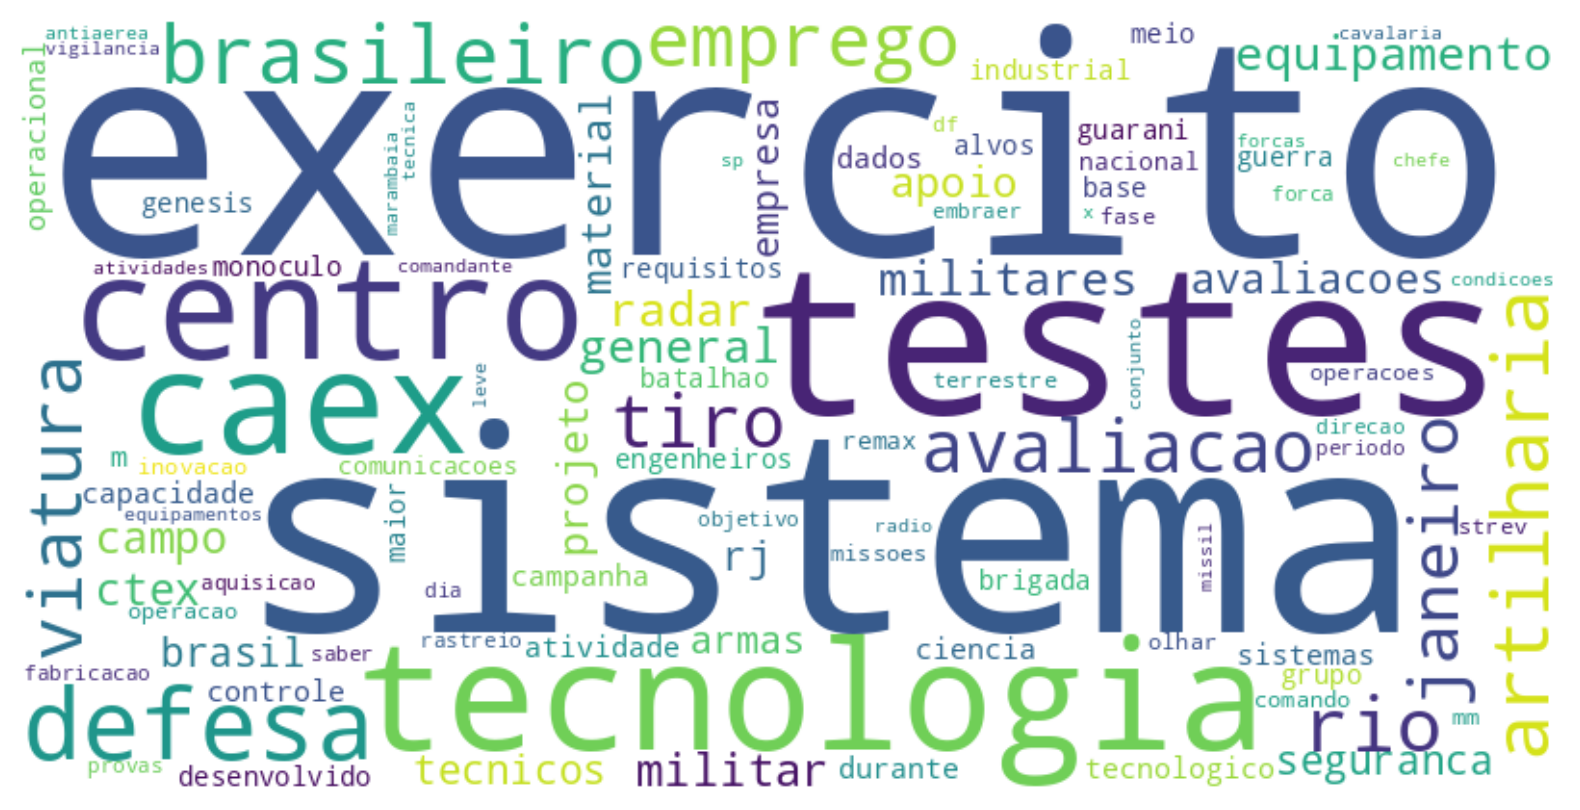

In [98]:
# Crie a nuvem de palavras
wordcloudr3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr3, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr3.to_file('nuvemResumo3.png')